In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df=pd.read_csv("/content/gdrive/MyDrive/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:

#checking for the null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Observation 0 :basic info about the data
1. Data have the total 768 rows and 9 columns
2. Data doea not contain any null values but it does contain the outlierts in it for Example: BloodPressure,Insulin,Glucose can not be zero if it would be zero person can't be alive

3. In further step we have to eliminate the those outlier

In [6]:
#statical summery
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# CORRELATION

In [7]:
#cheking for the correlation of the datas
df_corr=df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


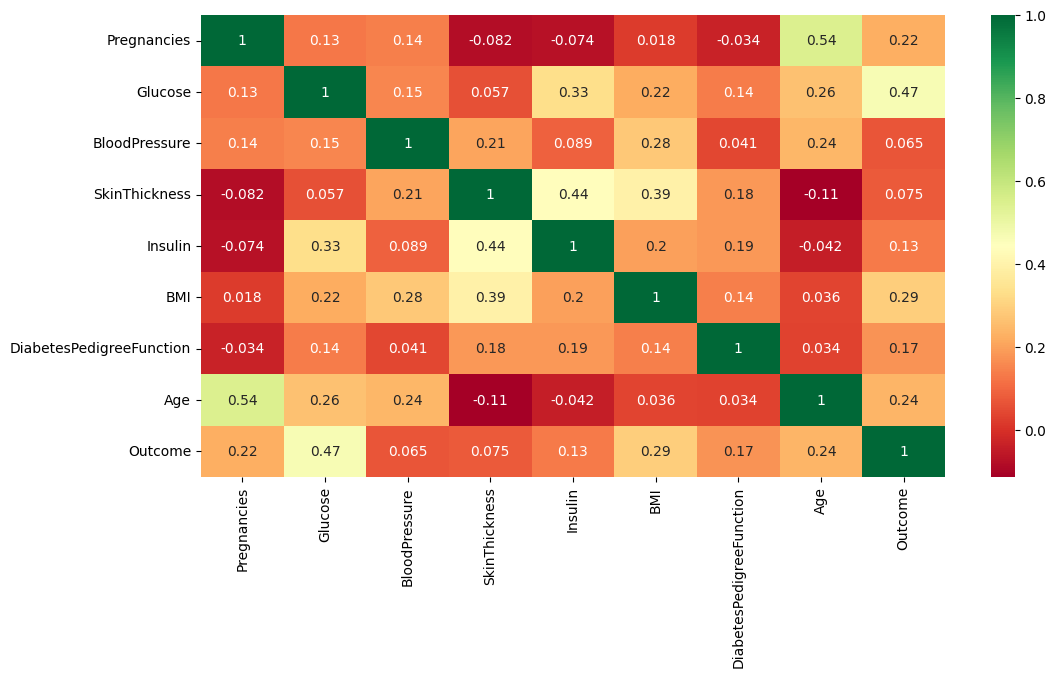

In [8]:
top_corr_features = df_corr.index
plt.figure(figsize=(12,6))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# as we can see all the corerlation of the all the feature in the dataset

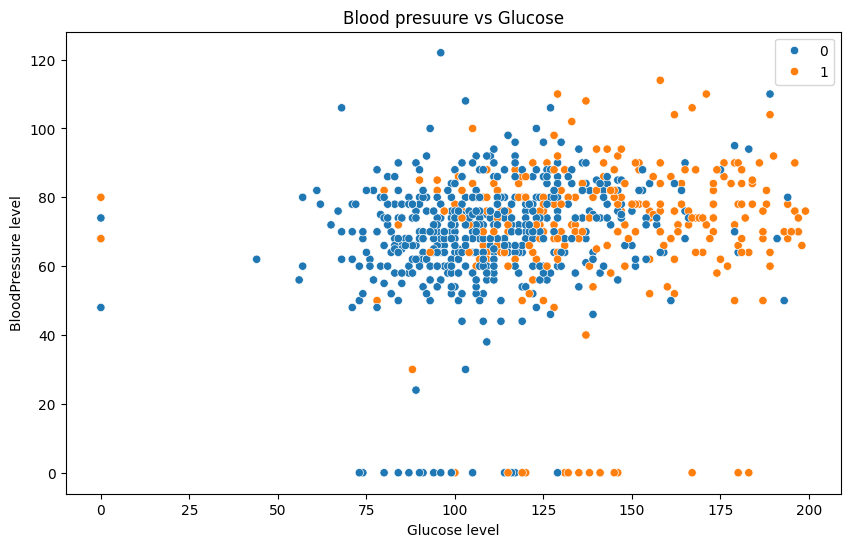

In [16]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df,x='Glucose',y='BloodPressure',hue='Outcome')
plt.title("Blood presuure vs Glucose")
plt.xlabel("Glucose level")
plt.ylabel("BloodPressure level")
plt.legend()
plt.show()

## 1.Observation

1. we can see that those who are having the high glucose level they are havinbg the diabetes so clucose is the one of the feture influencing the deiabetes

2. There is the no linear realtion between the Blood presuure and the Glucose

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


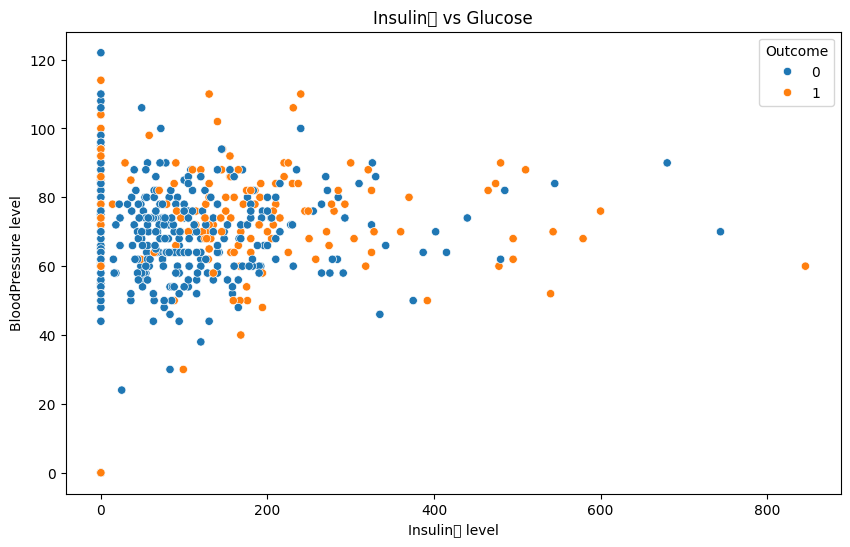

In [18]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df,x='Insulin',y='BloodPressure',hue='Outcome')
plt.title("Insulin	 vs Glucose")
plt.xlabel("Insulin	 level")
plt.ylabel("BloodPressure level")
plt.show()

## 2.Observation
1.There is no relationship between the blood presuure and the Insulin level

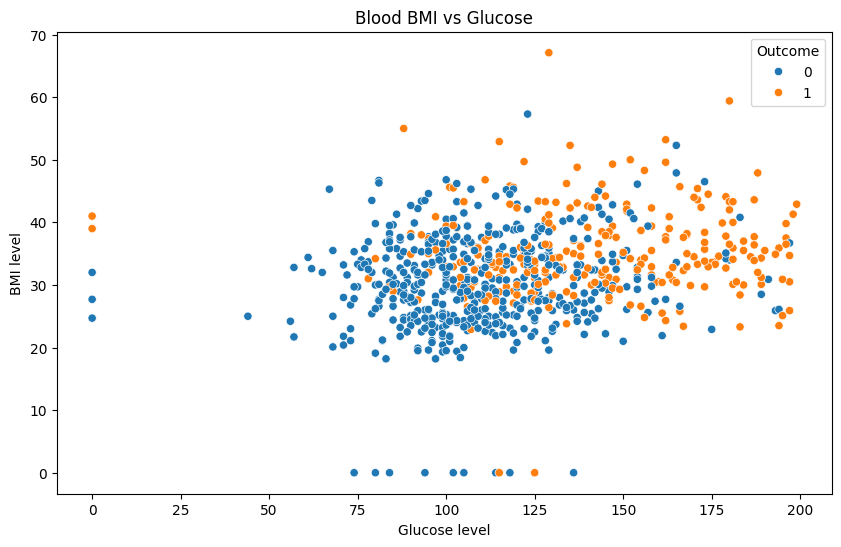

In [19]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df,x='Glucose',y='BMI',hue='Outcome')
plt.title("Blood BMI vs Glucose")
plt.xlabel("Glucose level")
plt.ylabel("BMI level")
plt.show()

## Observation
1. there is no strong realtionship but as from the figure we can say that those who are having the more BMI chance of hvaing the Glucose amount more
2.as Glucose is directly or Strongly Corrilated with the diabetes so we can dsay that chnace of havinf the diabetes is more in people who have more BMI rather than the less BMI people

In [20]:
# counting the total true and false prediction
diabetes_true_count = len(df.loc[df['Outcome'] == True])
diabetes_false_count = len(df.loc[df['Outcome'] == False])

(diabetes_true_count,diabetes_false_count)

(268, 500)

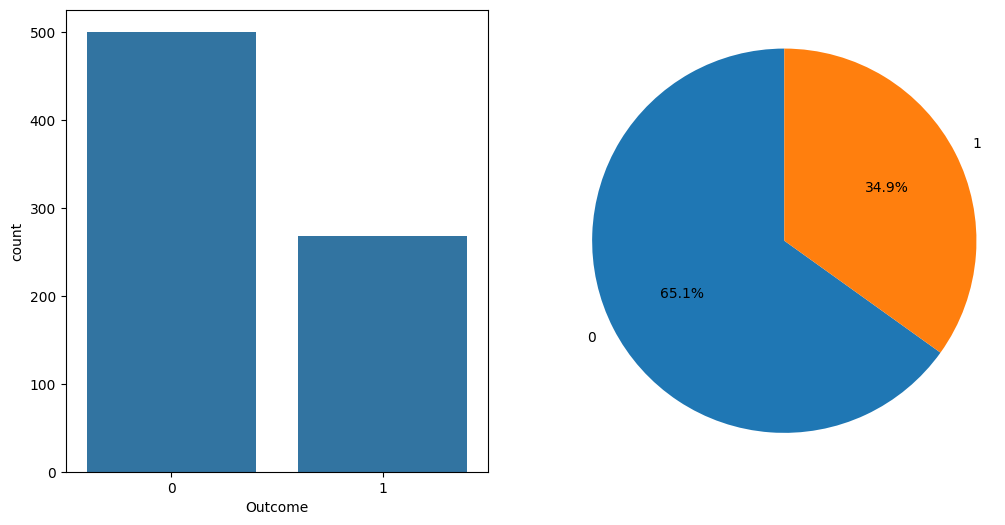

In [31]:
#visualization
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,6))

# Countplot on the first subplot (ax1)
sns.countplot(x='Outcome', data=df, ax=ax1)

# Pie chart on the second subplot (ax2) with percentage values
ax2.pie(df['Outcome'].value_counts(), labels=df['Outcome'].value_counts().index, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal for a circular pie chart
ax2.axis('equal')

# Display the plots
plt.show()

## 3.Observation
1.Total sample is 768 . out of the total 768 sample 500 sample are negative and
the 268 sample are positvie meaning out of 100 % people 34% people are having the daibetes which is not good

2.From the above analysis we can say that most of the people are not concern about thier health and the healthy dieting

# Checking for the missing values in each columns

In [32]:
#now replacing the zero values in above feature column
print("total number of rows : {0}".format(len(df)))
print("number of rows missing glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows missing skin thickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction : {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['Age'] == 0])))

total number of rows : 768
number of rows missing glucose: 5
number of rows missing BloodPressure: 35
number of rows missing skin thickness: 227
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing DiabetesPedigreeFunction : 0
number of rows missing age: 0


# Replacing all the missing values

In [33]:
#replacing all the zero values in feature data by mean values
# glucose_conc
df['Glucose'].replace(0,df['Glucose'].mean(),inplace=True)

In [34]:
df['BloodPressure'].replace(0,df['BloodPressure'].mean(),inplace=True)

In [35]:
df['SkinThickness'].replace(0,df['SkinThickness'].mean(), inplace=True)

In [36]:
df['Insulin'].replace(0,df['Insulin'].mean(),inplace=True)

In [37]:
df['BMI'].replace(0,df['BMI'].mean(),inplace=True)

# CONCLUSION
1. So all the missing values are removed from the all the columns now we can do the further process in data

2. So the most effecting factor in influencing the diavbetres factor is glucose after that BMI

3. so we can say that the probabilty of having diabetes is high in Fat people as compared to skinny pepple but it doesn't mean fat means unhealthy and skinny mens health it's just a theory and it's depenf upon person to person life style

4. Out of the 100 % peple 65 % are not having the daibetes where as 34.9 almost 35% people are having the diabetes positive

5. By analysis of the given data we got to know about the real time analysis of the data and the information extraction from the row data